In [36]:
import sys
print(sys.version)

3.5.3 |Anaconda 4.4.0 (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [81]:
# load dependencies
import pandas as pd
import io
import requests
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# reference: 
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

### Table of Content
1. [Goal of This Project](#section1)
2. [Golden Rule of Machine Learning](#section2)
3. [Exploratory Data Analysis](#section3)

<a id="section1"></a>
### Goal of This Project

I plan to go to Las Vegas with my undergrad buddies in June 2018. To ensure that we have a good time there, my goal is to find the best predictors that differentiate hotel scores based on user reviews. I will use my findings to book a hotel for our trip.

Data Source: [UCI Machine Learning Repository: Las Vegas Strip Data Set](http://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip)

<a id="section2"></a>
### Follow the "Golden Rule of Machine Learning"

Retrieve the data set from the source and set a side some data instances as a test set. Even before I start looking at the data. 

In [52]:
# load the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv"
raw_dataframe = pd.read_csv(url, delimiter=';')
# reference:
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url/41880513#41880513

# view the first 2 rows of raw data frame
raw_dataframe.head(2)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday


In [71]:
# convert data frame to numpy array
raw_data = raw_dataframe.values

# shuffle the array (in case it is sorted)
np.random.seed(123)
np.random.shuffle(raw_data)

# split 2 sets
training_set = raw_data[:336]
test_set = raw_data[336:]

# take out the "score" label
# reference:
# https://stackoverflow.com/questions/8386675/extracting-specific-columns-in-numpy-array
training_label = training_set[:, [4]].flatten()
test_label = test_set[:, [4]].flatten()

X = np.delete(training_set, 4, 1)
Xtest = np.delete(test_set, 4, 1)

In [54]:
# inspect the dimensions
training_set.shape

(336, 20)

In [72]:
training_label.shape

(336,)

<a id="section1"></a>
### Exploratory data analysis

I should learn more about the data set then start my feature selection with a deeper understanding of the data set.

In [84]:
# quick summary of the raw data
raw_dataframe.info()

# reference: 
# https://github.com/ubcs3/2017-Fall/blob/master/notes-2017-10-06/notes-2017-10-06.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
User country         504 non-null object
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Period of stay       504 non-null object
Traveler type        504 non-null object
Pool                 504 non-null object
Gym                  504 non-null object
Tennis court         504 non-null object
Spa                  504 non-null object
Casino               504 non-null object
Free internet        504 non-null object
Hotel name           504 non-null object
Hotel stars          504 non-null object
Nr. rooms            504 non-null int64
User continent       504 non-null object
Member years         504 non-null int64
Review month         504 non-null object
Review weekday       504 non-null object
dtypes: int64(6), object(14)
memory usage: 78.8+ KB


In [92]:
# count how many different hotels are there
np.count_nonzero(np.unique(training_set[:,13]))

21

> A total of 21 hotels are reviewed.

In [91]:
# list the names of hotels in the data set
np.unique(training_set[:,13])

array(['Bellagio Las Vegas', 'Caesars Palace',
       'Circus Circus Hotel & Casino Las Vegas',
       'Encore at wynn Las Vegas', 'Excalibur Hotel & Casino',
       'Hilton Grand Vacations at the Flamingo',
       'Hilton Grand Vacations on the Boulevard',
       "Marriott's Grand Chateau", 'Monte Carlo Resort&Casino',
       'Paris Las Vegas', 'The Cosmopolitan Las Vegas', 'The Cromwell',
       'The Palazzo Resort Hotel Casino', 'The Venetian Las Vegas Hotel',
       'The Westin las Vegas Hotel Casino & Spa',
       'Treasure Island- TI Hotel & Casino',
       'Tropicana Las Vegas - A Double Tree by Hilton Hotel',
       'Trump International Hotel Las Vegas',
       'Tuscany Las Vegas Suites & Casino', 'Wyndham Grand Desert',
       'Wynn Las Vegas'], dtype=object)

In [97]:
list(raw_dataframe)

['User country',
 'Nr. reviews',
 'Nr. hotel reviews',
 'Helpful votes',
 'Score',
 'Period of stay',
 'Traveler type',
 'Pool',
 'Gym',
 'Tennis court',
 'Spa',
 'Casino',
 'Free internet',
 'Hotel name',
 'Hotel stars',
 'Nr. rooms',
 'User continent',
 'Member years',
 'Review month',
 'Review weekday']

In [106]:
# convert training set to pandas data frame
training_set_df = pd.DataFrame(training_set)

# restore column names
training_set_df = training_set_df.rename(index=int, columns={0:'User country', 1:'Nr. reviews', 2:'Nr. hotel reviews', 3:'Helpful votes', 4:'Score', 
                                           5:'Period of stay', 6:'Traveler type', 7:'Pool', 8:'Gym', 9:'Tennis court', 10:'Spa', 11:'Casino',
 12:'Free internet', 13:'Hotel name', 14:'Hotel stars', 15:'Nr. rooms', 16:'User continent', 17:'Member years', 18:'Review month', 19:'Review weekday'})

In [120]:
training_set_df.groupby('Hotel name').sum()[["Nr. reviews", "Nr. hotel reviews", "Helpful votes", "Score"]]

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score
Hotel name,,,,
Bellagio Las Vegas,457,167,437,81
Caesars Palace,637,216,446,65
Circus Circus Hotel & Casino Las Vegas,447,124,293,50
Encore at wynn Las Vegas,1108,288,637,83
Excalibur Hotel & Casino,629,388,526,63
Hilton Grand Vacations at the Flamingo,597,210,255,58
Hilton Grand Vacations on the Boulevard,467,191,291,54
Marriott's Grand Chateau,1239,443,886,54
Monte Carlo Resort&Casino,1356,213,699,44


> Looking at the sum of reviews and scores, I realize that there is a big gap between the highest-rated hotel and the lowest.

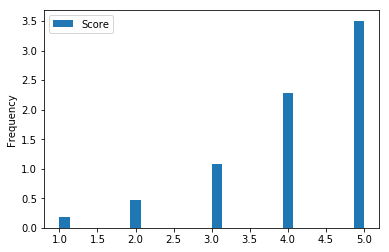

In [118]:
training_set_df.plot.hist(y="Score", bins=30, normed=True)
plt.show()

> Most hotels seem to be in the 5.0 range.

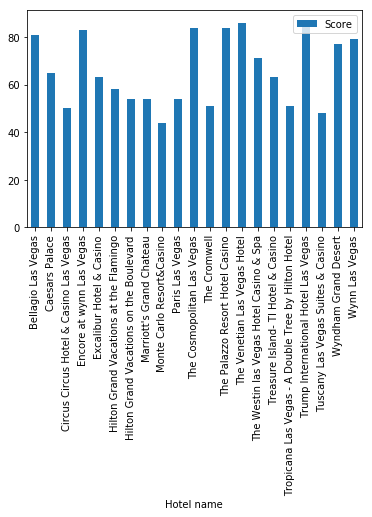

In [122]:
training_set_df.groupby("Hotel name").sum().plot.bar(y="Score")
plt.show()